In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\com01\\Documents\\Codepython\\2019_nCoV_data.csv')

In [3]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [4]:
set(df['Country']) # เรียกดูประเทศที่ไม่ซ้ำกัน

{'Australia',
 'Belgium',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Ivory Coast',
 'Japan',
 'Macau',
 'Mainland China',
 'Malaysia',
 'Mexico',
 'Nepal',
 'Others',
 'Philippines',
 'Russia',
 'Singapore',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'US',
 'United Arab Emirates',
 'Vietnam'}

## แก้ missing

In [5]:
df.isnull().any() # ตรวจสอบว่าที่คอลัมภ์ใดมีค่า missing

Sno               False
Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [6]:
df['Province/State'] = df['Province/State'].fillna('unknown') # ทำการแก้ไข missing โดยเติมค่า unknown

In [7]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [8]:
df.isnull().any() # ตรวจสอบค่า missing อีกครั้ง จะเห็นได้ว่าไม่มีค่า missing ในตารางแล้ว

Sno               False
Date              False
Province/State    False
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [9]:
set(df['Country']) # เรียกดูประเทศที่ไม่ซ้ำ

{'Australia',
 'Belgium',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Ivory Coast',
 'Japan',
 'Macau',
 'Mainland China',
 'Malaysia',
 'Mexico',
 'Nepal',
 'Others',
 'Philippines',
 'Russia',
 'Singapore',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'US',
 'United Arab Emirates',
 'Vietnam'}

## groupby

In [10]:
df['รวม'] = df.Confirmed + df.Deaths - df.Recovered # ทำการสร้างตัวแปร รวม ขึ้นมาใหม่

In [11]:
data1 = df.groupby('Country')['Province/State'].apply(list) # ทำการ groupby ประเทศกับจังหวัด

In [12]:
data1=df.groupby('Country')['รวม'].sum().reset_index() # นำค่ารวมไปใส่ในตารางที่ทำการ groupby แล้ว

In [13]:
data1

,Country,รวม
0,Australia,214.0
1,Belgium,13.0
2,Brazil,0.0
3,Cambodia,16.0
4,Canada,110.0
5,China,549.0
6,Egypt,4.0
7,Finland,13.0
8,France,171.0
9,Germany,247.0


In [14]:
df['Confirmed_df'] = df.Confirmed # เป็นการนำค่าของผู้ที่ติดเชื้อ covid19 มาใส่ในตารางตารางที่ทำการ groupby เเล้ว
data2 = df.groupby('Country')['Province/State'].apply(list)
data2=df.groupby('Country')['Confirmed_df'].sum().reset_index()
data2

,Country,Confirmed_df
0,Australia,284.0
1,Belgium,14.0
2,Brazil,0.0
3,Cambodia,22.0
4,Canada,116.0
5,China,549.0
6,Egypt,4.0
7,Finland,20.0
8,France,186.0
9,Germany,252.0


In [15]:
df['Deaths_df'] = df.Deaths # เป็นการนำค่าคนที่ตาย มาใส่ในตารางตารางที่ทำการ groupby เเล้ว
data3 = df.groupby('Country')['Province/State'].apply(list)
data3=df.groupby('Country')['Deaths_df'].sum().reset_index()
data3

,Country,Deaths_df
0,Australia,0.0
1,Belgium,0.0
2,Brazil,0.0
3,Cambodia,0.0
4,Canada,0.0
5,China,0.0
6,Egypt,0.0
7,Finland,0.0
8,France,3.0
9,Germany,0.0


In [16]:
df['Recovered_df'] = df.Recovered # เป็นการนำค่าคนที่รักษาหาย มาใส่ในตารางตารางที่ทำการ groupby เเล้ว
data4 = df.groupby('Country')['Province/State'].apply(list)
data4=df.groupby('Country')['Recovered_df'].sum().reset_index()
data4

,Country,Recovered_df
0,Australia,70.0
1,Belgium,1.0
2,Brazil,0.0
3,Cambodia,6.0
4,Canada,6.0
5,China,0.0
6,Egypt,0.0
7,Finland,7.0
8,France,18.0
9,Germany,5.0


In [17]:
data =pd.DataFrame(data1).reset_index()

In [18]:
data

,index,Country,รวม
0,0,Australia,214.0
1,1,Belgium,13.0
2,2,Brazil,0.0
3,3,Cambodia,16.0
4,4,Canada,110.0
5,5,China,549.0
6,6,Egypt,4.0
7,7,Finland,13.0
8,8,France,171.0
9,9,Germany,247.0


## การรวมตาราง

In [19]:
data_covid19 = data2.merge(data1,how='left',left_on='Country',right_on='Country')

In [20]:
data_covid19

,Country,Confirmed_df,รวม
0,Australia,284.0,214.0
1,Belgium,14.0,13.0
2,Brazil,0.0,0.0
3,Cambodia,22.0,16.0
4,Canada,116.0,110.0
5,China,549.0,549.0
6,Egypt,4.0,4.0
7,Finland,20.0,13.0
8,France,186.0,171.0
9,Germany,252.0,247.0


In [21]:
data1_covid19 = data3.merge(data_covid19,how='left',left_on='Country',right_on='Country')

In [22]:
data1_covid19

,Country,Deaths_df,Confirmed_df,รวม
0,Australia,0.0,284.0,214.0
1,Belgium,0.0,14.0,13.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,0.0,22.0,16.0
4,Canada,0.0,116.0,110.0
5,China,0.0,549.0,549.0
6,Egypt,0.0,4.0,4.0
7,Finland,0.0,20.0,13.0
8,France,3.0,186.0,171.0
9,Germany,0.0,252.0,247.0


In [23]:
data2_covid19 = data4.merge(data1_covid19,how='left',left_on='Country',right_on='Country')

In [24]:
data2_covid19

,Country,Recovered_df,Deaths_df,Confirmed_df,รวม
0,Australia,70.0,0.0,284.0,214.0
1,Belgium,1.0,0.0,14.0,13.0
2,Brazil,0.0,0.0,0.0,0.0
3,Cambodia,6.0,0.0,22.0,16.0
4,Canada,6.0,0.0,116.0,110.0
5,China,0.0,0.0,549.0,549.0
6,Egypt,0.0,0.0,4.0,4.0
7,Finland,7.0,0.0,20.0,13.0
8,France,18.0,3.0,186.0,171.0
9,Germany,5.0,0.0,252.0,247.0


In [25]:
covid_19 = data2_covid19[['Country','Confirmed_df','Deaths_df','Recovered_df','รวม']] #ทำการเลือกคอลัมภ์ที่เราสนใจ

In [26]:
covid_19

,Country,Confirmed_df,Deaths_df,Recovered_df,รวม
0,Australia,284.0,0.0,70.0,214.0
1,Belgium,14.0,0.0,1.0,13.0
2,Brazil,0.0,0.0,0.0,0.0
3,Cambodia,22.0,0.0,6.0,16.0
4,Canada,116.0,0.0,6.0,110.0
5,China,549.0,0.0,0.0,549.0
6,Egypt,4.0,0.0,0.0,4.0
7,Finland,20.0,0.0,7.0,13.0
8,France,186.0,3.0,18.0,171.0
9,Germany,252.0,0.0,5.0,247.0


## การพลอตกราฟ

In [27]:
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
data_small = covid_19.iloc[24:,:] # ทำการเลือกข้อมูลเพียง 10 ประเทศมาพลอตกราฟ

In [29]:
data_small

,Country,Confirmed_df,Deaths_df,Recovered_df,รวม
24,South Korea,444.0,0.0,63.0,381.0
25,Spain,27.0,0.0,6.0,21.0
26,Sri Lanka,22.0,0.0,10.0,12.0
27,Sweden,18.0,0.0,0.0,18.0
28,Taiwan,320.0,2.0,16.0,306.0
29,Thailand,581.0,0.0,176.0,405.0
30,UK,93.0,0.0,20.0,73.0
31,US,250.0,0.0,27.0,223.0
32,United Arab Emirates,126.0,0.0,15.0,111.0
33,Vietnam,225.0,0.0,57.0,168.0


## Bar Chart

Text(0, 0.5, 'Number of people infect')

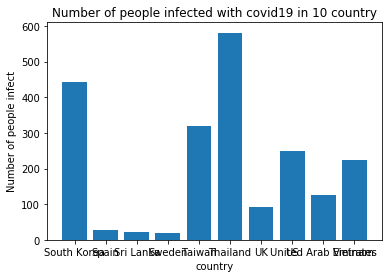

In [30]:
plt.bar([1,2,3,4,5,6,7,8,9,10],data_small.iloc[:,1],tick_label = data_small.iloc[:,0])
plt.title('Number of people infected with covid19 in 10 country')
plt.xlabel('country')
plt.ylabel('Number of people infect')

## Bar Chart ที่ทำการเปรียบเทียบ ค่าของข้อมูลของคนที่ติดเชื้อ คนที่ตาย และคนที่รักษาหาย ของทั้ง 10 ประเทศ

Text(0, 0.5, 'Number of people')

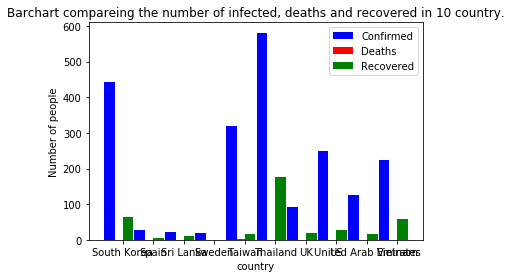

In [31]:
plt.bar([1-(0.35/2),2-(0.35/2),3-(0.35/2),4-(0.35/2),5-(0.35/2),6-(0.35/2),7-(0.35/2),8-(0.35/2),9-(0.35/2),10-(0.35/2)],
        data_small.iloc[:,1],width=0.35,tick_label=data_small.iloc[:,0],color= 'b',label='Confirmed',align='edge')
plt.bar([1+(0.35/2),2+(0.35/2),3+(0.35/2),4+(0.35/2),5+(0.35/2),6+(0.35/2),7+(0.35/2),8+(0.35/2),9+(0.35/2),10+(0.35/2)],
        data_small.iloc[:,2],width=0.35,tick_label=data_small.iloc[:,0],color= 'r',label='Deaths',align='edge')
plt.bar([1+(2.5*0.35/2),2+(2.5*0.35/2),3+(2.5*0.35/2),4+(2.5*0.35/2),5+(2.5*0.35/2),6+(2.5*0.35/2),7+(2.5*0.35/2),8+(2.5*0.35/2),9+(2.5*0.35/2),10+(2.5*0.35/2)],
        data_small.iloc[:,3],width=0.35,tick_label=data_small.iloc[:,0],color= 'g',label='Recovered',align='edge')
plt.title('Barchart compareing the number of infected, deaths and recovered in 10 country.')
plt.xlabel('country')
plt.legend(loc=1) # กำหนดที่บอกสีนี้คือปีใด โดยสามารถใส่ค่าเป็น (1-10)
plt.ylabel('Number of people')

## แผนภูมิต้นไม้

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [33]:
infected = data_small['Confirmed_df']

In [34]:
labels = ['South Korea\n444.0', 'Spain\n27.0',
          'Sri Lanka\n22.0', 'Sweden\n18.0',
          'Taiwan\n320.0','Thailand\n581.0','UK\n93.0','US\n250.0','United Arab Emirates\n126.0','Vietnam\n225.0']
# เป็น list ของคำอธิบายกราฟ
# \n คือการขึ้นบรรทัดใหม่
color_list = [ '#0f7216', '#b2790c','#ffe9a3',
              '#f9d4d4','#ea3033', 'r','y','b','g','m']
# เป็น list ของ สี

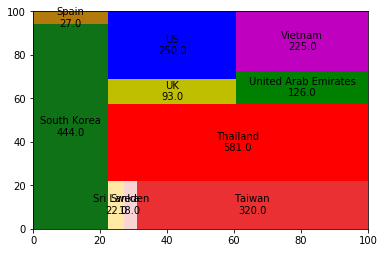

In [35]:
squarify.plot(sizes=infected, label=labels,
              color=color_list, alpha=1)

## ทำการเซฟตารางเป็นไฟล์ csv

In [44]:
covid_19.to_csv('covid19.csv')

In [45]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C4D1-3557

 Directory of C:\Users\com01\Documents\Codepython\python_dataviz

03/19/2020  02:02 AM    <DIR>          .
03/19/2020  02:02 AM    <DIR>          ..
01/21/2020  04:20 PM                26 .gitignore
03/06/2020  03:17 PM    <DIR>          .ipynb_checkpoints
01/07/2020  10:30 PM           151,698 1.png
01/21/2020  06:01 PM            29,601 15.png
01/21/2020  06:03 PM            66,028 16.png
01/24/2020  04:05 PM            31,110 17.png
01/24/2020  04:06 PM            18,722 18.png
01/24/2020  04:07 PM            10,876 19.png
01/07/2020  10:49 PM           587,218 2.png
01/24/2020  04:08 PM            21,244 20.png
01/24/2020  04:09 PM            25,233 21.png
01/24/2020  04:11 PM            30,426 22.png
01/24/2020  04:12 PM            14,354 23.png
01/07/2020  10:42 PM            96,502 add.png
02/21/2020  03:21 PM            59,392 Average Debt.xls.xls
01/07/2020  10:17 PM           108,668 colab1.png
01/07/2020  1

# การเตรียมโค้ดที่จะดึงตาราง covid19 เข้าสู่power BI

In [51]:
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
covid19_BI = pd.read_csv('C:\\Users\\com01\\Documents\\Codepython\\python_dataviz\\covid19.csv')

In [53]:
covid19_BI.head()

,Unnamed: 0,Country,Confirmed_df,Deaths_df,Recovered_df,รวม
0,0,Australia,284.0,0.0,70.0,214.0
1,1,Belgium,14.0,0.0,1.0,13.0
2,2,Brazil,0.0,0.0,0.0,0.0
3,3,Cambodia,22.0,0.0,6.0,16.0
4,4,Canada,116.0,0.0,6.0,110.0


![final](28.png)

![ff](26.png)

![final1](25.png)

![ttt](29.png)